**Team:** Sigmoid Freud

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
%matplotlib inline

**1 (a)**

In [2]:
sound1 = np.loadtxt('sound1.dat')
sound2 = np.loadtxt('sound2.dat')
p = 18000
freq = 8192
sound1.shape

(18000,)

**1(b)**

$\underline{x^{(\alpha)}} = \underline{A}  \underline{s^{(\alpha)}}$      $\alpha = 1,2,....p$

In [3]:
s = np.concatenate([[sound1, sound2]], axis=1)
A = np.linalg.inv(np.random.rand(2,2))
x = np.dot(A,s)
x.shape

(2, 18000)

**1(c)**

In [4]:
X = x.copy()
X = X[:,np.random.permutation(x.shape[1])]

**1(d)**

$\rho_{s_{i},x_{j}} = \frac{cov(s_{i},x_{j})}{\sigma_{s_{i}} \sigma_{x_{j}}}$

In [5]:
rho_00 = (np.cov(s[0, :], X[1, :]) / (np.std(s[0, :]) * np.std(X[1, :])))[0, 1]
rho_01 = (np.cov(s[0, :], X[1, :])/(np.std(s[0, :])*np.std(X[1, :])))[0, 1]
rho_10 = (np.cov(s[1, :], X[0, :])/(np.std(s[1, :])*np.std(X[0, :])))[0, 1]
rho_11 = (np.cov(s[1, :], X[1, :])/(np.std(s[1, :])*np.std(X[1, :])))[0, 1]
print("The correlation between source and center are: {}, {}, {}, {}".format(rho_00, rho_01, rho_10, rho_11))

The correlation between source and center are: -0.020127691020073807, -0.020127691020073807, 0.0007743751934729907, -5.2216880876233544e-05


**1(e)**

In [6]:
X -= X.mean(axis=1).reshape((2, 1))
x -= x.mean(axis=1).reshape((2, 1))

**1(f)**

In [7]:
W = np.random.rand(2, 2)

**2(a)**

In [11]:
def transfer_function(x):
    return 1 - 2 * (1 / (1 + np.exp(-x)))


def standard_gradient(W, w_inv, X, epsilon):
    for t, row in enumerate(X.T):
        epsilon = epsilon*0.99999
        W_new = W.copy()

        for (i, j), _ in np.ndenumerate(W):

            temp = 0
            for k, _ in enumerate(row):
                temp += W[i, k]*row[k]
            dw = (w_inv[j, i] + transfer_function(temp)*row[j])
            W_new[i, j] += epsilon*dw

        W = W_new

    return W

**2(b)**

In [12]:
def natural_gradient(W, X, epsilon, w_inv, iden):
    f_matrix = []
    for t, x in enumerate(X.T):
        epsilon = 0.9999*epsilon  
        W_new = W.copy()

        # Loop through each (i,j) pair in W
        for (i, j), _ in np.ndenumerate(W):
            temp = 0
            for l in range(W.shape[0]):
                y = 0
                yl = 0
                for k, _ in enumerate(x):
                    y += W[i, k]*x[k]
                    yl += W[l, k]*x[k]

                # Calculate partial of error function with respect to w
                temp += (iden[i, l] + transfer_function(y)*yl)*W[l, j]

                # Update weights
            W_new[i, j] += epsilon*temp

        # Update W
        W = W_new
            
    return W

**2(c)**

In [13]:
W_standard = W.copy()
W_natural = W.copy()

W_inv_standard = np.linalg.inv(W_standard)
ep = 0.01

W_standard = standard_gradient(
    W, W_inv_standard, x, ep)


W_inv_natural, f_matrix = np.linalg.inv(W_natural)
ep = 0.01
mat = np.identity(W_natural.shape[0])

W_natural = natural_gradient(
    W, x, ep, W_inv_natural, mat)

**3(a)**

In [14]:
t = np.arange(s.shape[1])/freq

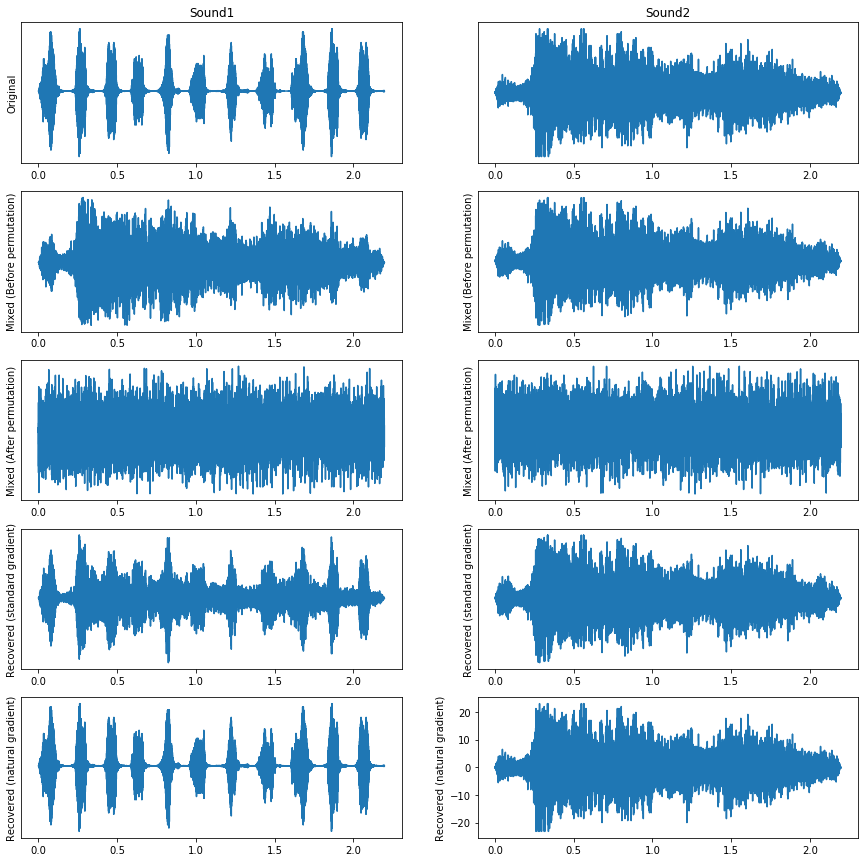

In [15]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

plt.sca(axs[0, 0])
plt.title('Sound1')
plt.ylabel('Original')
plt.yticks([])
plt.plot(t, s[0])


plt.sca(axs[0, 1])
plt.title('Sound2')
plt.plot(t, s[1])
plt.yticks([])

plt.sca(axs[1, 0])
plt.plot(t, x[0])
plt.ylabel('Mixed (Before permutation)')
plt.yticks([])

plt.sca(axs[1, 1])
plt.plot(t, x[1])
plt.ylabel('Mixed (Before permutation)')
plt.yticks([])

plt.sca(axs[2, 0])
plt.plot(t, X[0])
plt.ylabel('Mixed (After permutation)')
plt.yticks([])

plt.sca(axs[2, 1])
plt.plot(t, X[1])
plt.ylabel('Mixed (After permutation)')
plt.yticks([])

s_standard = np.dot(W_standard, x)

plt.sca(axs[3, 0])
plt.plot(t, s_standard[0])
plt.ylabel('Recovered (standard gradient)')
plt.yticks([])

plt.sca(axs[3, 1])
plt.plot(t, s_standard[1])
plt.ylabel('Recovered (standard gradient)')
plt.yticks([])

s_natural = np.dot(W_natural, x)

plt.sca(axs[4, 0])
plt.plot(t, s_natural[0])
plt.ylabel('Recovered (natural gradient)')
plt.yticks([])

plt.sca(axs[4, 1])
plt.plot(t, s_natural[1])
plt.ylabel('Recovered (natural gradient)')
plt.show()

Saving the sounds

In [16]:
wavfile.write('original_01.wav', freq, s[0])
wavfile.write('s01_mixed.wav', freq, X[0])
wavfile.write('recovered_01.wav', freq, s_natural[0])
wavfile.write('original_02.wav', freq, s[1])
wavfile.write('s02_mixed.wav', freq, X[1])
wavfile.write('recovered_02.wav', freq, s_natural[1])

**3(b)**

In [17]:
s_natural.shape

(2, 18000)

In [18]:
rho_new_00 = (np.cov(s[0, :], s_natural[1, :]) / (np.std(s[0, :]) * np.std(s_natural[1, :])))[0, 1]
rho_new_01 = (np.cov(s[0, :], s_natural[1, :])/(np.std(s[0, :])*np.std(s_natural[1, :])))[0, 1]
rho_new_10 = (np.cov(s[1, :], s_natural[0, :])/(np.std(s[1, :])*np.std(s_natural[0, :])))[0, 1]
rho_new_11 = (np.cov(s[1, :], s_natural[1, :])/(np.std(s[1, :])*np.std(s_natural[1, :])))[0, 1]
print("The correlation between source and center are: {}, {}, {}, {}".format(rho_new_00, rho_new_01, rho_new_10, rho_new_11))

The correlation between source and center are: 0.0007869963154863807, 0.0007869963154863807, 0.004067414678512407, 1.0000554465612854


**3(d)**

In [19]:
f_true1, den_true1 = signal.periodogram(sound1 , freq)
f_mixed1, den_mixed1 = signal.periodogram(X[0, :] , freq)
f_unmixed1, den_unmixed1 = signal.periodogram(x[0, :] , freq)

f_true2, den_true2 = signal.periodogram(sound2 , freq)
f_mixed2, den_mixed2 = signal.periodogram(X[1, :] , freq)
f_unmixed2, den_unmixed2 = signal.periodogram(x[1, :] , freq)

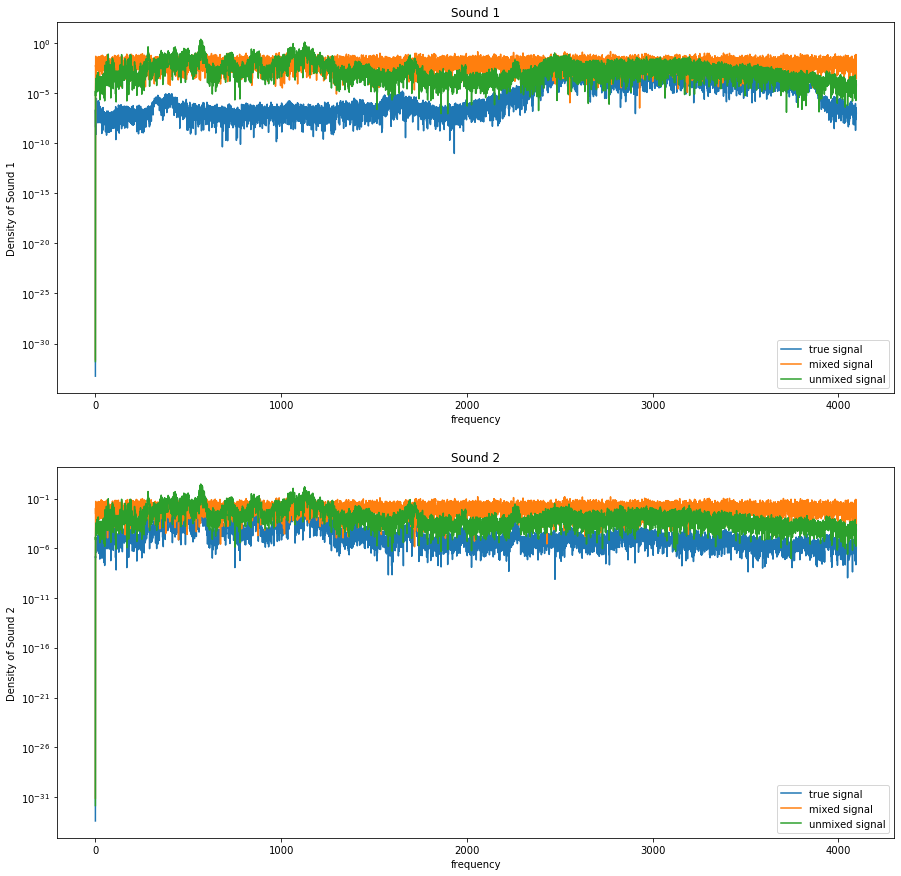

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))

plt.sca(axs[0])
plt.semilogy(f_true1, den_true1,label = 'true signal')
plt.semilogy(f_mixed1, den_mixed1, label = 'mixed signal')
plt.semilogy(f_unmixed1, den_unmixed1, label = 'unmixed signal' )
plt.title('Sound 1')
plt.legend()
plt.ylabel('Density of Sound 1')
plt.xlabel('frequency')

plt.sca(axs[1])
plt.semilogy(f_true2, den_true2, label = 'true signal')
plt.semilogy(f_mixed2, den_mixed2, label = 'mixed signal')
plt.semilogy(f_unmixed2, den_unmixed2, label = 'unmixed signal')
plt.title('Sound 2')
plt.legend()
plt.ylabel('Density of Sound 2')
plt.xlabel('frequency')
plt.show()